In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

class person:
    def __init__(self,pid,startt,endt,state,resistant,pro):
        self.pid=pid
        self.startt=startt
        self.endt=endt
        self.state=state
        self.resistant=resistant
        self.pro=pro
    def changeState(self,ns,i):
        self.state=ns
        self.startt=i
        self.endt=i+4
    def State(self,ns):
        self.state=ns
    def recover(self,ns):
        self.state=ns
        self.startt=-1
        self.endt=-1
        self.resistant=1
    def printId(self):
        return self.state
    def getpro(self):
        return self.pro
    def getEndTime(self):
        return self.endt

row=100
col=100
days=200
count=0
rec=0
net_inf=0
inf_net=[]
new_recoveries=[]
time=np.arange(1,days+1)
def infect(t):
    global arr,count,net_inf,inf_net,new_recoveries,rec
    m=net_inf
    n=rec
    for i in range(0,row):
        for j in range(0,col):
            if(arr[i][j].printId()==1):
                if(arr[i][j].getEndTime()<=t):
                    arr[i][j].recover(2)
                    rec+=1
                else:
                    di, dj = random.choice ([(-1, -1), (-1,0), (-1, + 1), (0, -1), (0, + 1), (+1, -1), (+ 1,0), (+1, + 1)])
                    i2 = abs((i + di)% row)
                    j2 = abs((j + dj)% col)
                    if(arr[i2][j2].printId()==0  and arr[i2][j2].pro <=0.80):
                        arr[i2][j2].changeState(1,t)
                        net_inf+=1
                    else:
                        continue
    m=net_inf-m
    n=rec-n;
    inf_net.append(m)
    new_recoveries.append(n)
def printarr(arr):
    
    for i in range (0,row):
        for j in range(0,col):
            print(arr[i][j].printId(),end=" ")
        print("\r")      
def skewness(df,path):
    x = df['Infection rate'].rolling(window=5).skew()
    x=x.tolist()
    x=x[4:]+x[:4]
    df["Skewness"] = x
    df.to_csv(path, index=False)
def standard(df,path):
    sma = df['Infection rate'].rolling(window=5).std()
    sma=sma.tolist()
    sma=sma[4:]+sma[:4]
    df["Standard_Deviation"] = sma
    df.to_csv(path, index=False)
def kuritosis(df,path):
    y = df['Infection rate'].rolling(window=5).kurt()
    y=y.tolist()
    y=y[4:]+y[:4]
    df["Kurtosis"] = y
    df.to_csv(path, index=False)

def deltime(df,path):
    global inf_net;
    var1=inf_net[::-1]
    n=200
    index=0
    for i in range(n):
        if(var1[i]>0):
            index=i;
            break
    var=np.arange(0,n-index+1);
    var=var[::-1]
    n=n-len(var)
    another_list = [0] * 200
    another_list=another_list[:n]
    var=var.tolist()
    var.extend(another_list)
    df["Remaining Time"] = var[:200]
    df.to_csv(path, index=False)
    
def spread():
    global count
    for i in range(0,days):
        count+=1
        infect(count)
        
def createCSV(i,j):
    global arr,count,net_inf,inf_net,new_recoveries,rec
    path='C:/Users/hanes/Documents/Urop/Urop/Urop/datasets/'+str((j)//3)+'/dataset'+str(i)+'.csv'
    print((j)//3)
    dict = {'time': time, 'Infection rate': inf_net, 'Recovery Rate': new_recoveries} 
    df = pd.DataFrame(dict)
    df.to_csv(path,index=False)
    standard(df,path)
    skewness(df,path)
    kuritosis(df,path)
    deltime(df,path)
arr = np.empty((row, col), dtype=object) 


def makempty(j):
    global arr,row,col
    ecount=0
    h=(row*col/100)
    while(j!= 0 and ecount<j*h ):
        m=random.randrange(0,100)
        p=random.randrange(0,100)
        if(arr[m][p].printId()!= 3):
            arr[m][p].State(3)
            ecount+=1
'''   setting  up the matrix  '''
def initalize(k):
    global arr,count,net_inf,inf_net,new_recoveries,rec
    for i in range (0,row): 
        for j in range(0,col):
            persons=person(count,-1,-1,0,0,random.random())
            arr[i][j] =persons
    makempty(k)
    
def plot():
    plt.xlabel("days")
    plt.ylabel("infected")
    plt.title(" infected vs days  ")
    plt.plot(time,inf_net)
def run():
    global arr,count,net_inf,inf_net,new_recoveries,rec
    for j in range (0,13,3):
        for i in range (0,100):
            row=100
            col=100
            initalize(j);
            days=100
            count=1
            rec=0
            net_inf=0
            inf_net.clear()
            new_recoveries.clear()
            k=random.randint(0, row-1) 
            l=random.randint(0, col-1) 
            arr[k][l].changeState(1,0)
            spread()
            createCSV(i+1,j)
            print("successfully created "+str(i+1)+"th dataset" );
run()

0
successfully created 1th dataset
0
successfully created 2th dataset
0
successfully created 3th dataset
0
successfully created 4th dataset
0
successfully created 5th dataset
0
successfully created 6th dataset
0
successfully created 7th dataset
0
successfully created 8th dataset
0
successfully created 9th dataset
0
successfully created 10th dataset
0
successfully created 11th dataset
0
successfully created 12th dataset
0
successfully created 13th dataset
0
successfully created 14th dataset
0
successfully created 15th dataset
0
successfully created 16th dataset
0
successfully created 17th dataset
0
successfully created 18th dataset
0
successfully created 19th dataset
0
successfully created 20th dataset
0
successfully created 21th dataset
0
successfully created 22th dataset
0
successfully created 23th dataset
0
successfully created 24th dataset
0
successfully created 25th dataset
0
successfully created 26th dataset
0
successfully created 27th dataset
0
successfully created 28th dataset
0

2
successfully created 30th dataset
2
successfully created 31th dataset
2
successfully created 32th dataset
2
successfully created 33th dataset
2
successfully created 34th dataset
2
successfully created 35th dataset
2
successfully created 36th dataset
2
successfully created 37th dataset
2
successfully created 38th dataset
2
successfully created 39th dataset
2
successfully created 40th dataset
2
successfully created 41th dataset
2
successfully created 42th dataset
2
successfully created 43th dataset
2
successfully created 44th dataset
2
successfully created 45th dataset
2
successfully created 46th dataset
2
successfully created 47th dataset
2
successfully created 48th dataset
2
successfully created 49th dataset
2
successfully created 50th dataset
2
successfully created 51th dataset
2
successfully created 52th dataset
2
successfully created 53th dataset
2
successfully created 54th dataset
2
successfully created 55th dataset
2
successfully created 56th dataset
2
successfully created 57th 

4
successfully created 59th dataset
4
successfully created 60th dataset
4
successfully created 61th dataset
4
successfully created 62th dataset
4
successfully created 63th dataset
4
successfully created 64th dataset
4
successfully created 65th dataset
4
successfully created 66th dataset
4
successfully created 67th dataset
4
successfully created 68th dataset
4
successfully created 69th dataset
4
successfully created 70th dataset
4
successfully created 71th dataset
4
successfully created 72th dataset
4
successfully created 73th dataset
4
successfully created 74th dataset
4
successfully created 75th dataset
4
successfully created 76th dataset
4
successfully created 77th dataset
4
successfully created 78th dataset
4
successfully created 79th dataset
4
successfully created 80th dataset
4
successfully created 81th dataset
4
successfully created 82th dataset
4
successfully created 83th dataset
4
successfully created 84th dataset
4
successfully created 85th dataset
4
successfully created 86th 

In [44]:
import os
import glob
import pandas as pd
for p in range(3,4):
    os.chdir(r'C:/Users/hanes/Documents/Urop/Urop/Urop/datasets/'+str(p)+'')
    extension = 'csv'
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
    combined_csv.to_csv( "combined_csv"+str(p)+".csv", index=False, encoding='utf-8-sig')

                           FOR DATASET  1                       





Total No of Infected: 633040


r2 Score Value: 0.9200671207129845


Mean Square Error: 138.75215666930387




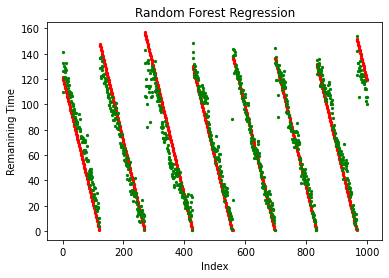

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
for k in range(0,1):
    dataset = pd.read_csv(r'C:/Users/hanes/Documents/Urop/Urop/Urop/datasets/'+str(k)+'/combined_csv'+str(k)+'.csv')
    dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
    dataset.dropna(inplace=True)
    print("                           FOR DATASET ",k+1,"                      ")
    print("")
    print("")
    print("")
    print("")
    print("")
    Total = dataset['Infection rate'].sum()
    print("Total No of Infected:",Total)
    print("")
    print("")      
    test=dataset.iloc[:1000]
    train=dataset.iloc[1001:]
    X_train = train.iloc[:, :6]
    y_train = train.iloc[:, 6:]
    X_test = test.iloc[:, :6]
    y_test = test.iloc[:, 6:]
    avg=y_test["Remaining Time"].mean()
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(X_train, y_train.values.ravel())
    y_pred = regressor.predict(X_test)
    e_dataframe = pd.DataFrame(y_pred)
    d=r2_score(y_test,e_dataframe)
    print("r2 Score Value:",d)
    print("") 
    print("")      
    c=mean_squared_error(y_test,e_dataframe)
    print("Mean Square Error:",c)
    print("")   
    print("")  
    M=test['time']
    a = pd.DataFrame(M)
    a['index'] = np.arange(len(a))
    a.drop('time', inplace=True, axis=1)
    X_grid = np.arange(min(M), max(M), 0.001)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(a, y_test,s=5,color = 'red')
    plt.scatter(a, y_pred, s=5,color = 'green')
    plt.title('Random Forest Regression')
    plt.xlabel('Index')
    plt.ylabel('Remanining Time')
    plt.show()
    print("")
    print("")
    print("")
    print("")

     

In [2]:
dataset1 = pd.read_csv(r'C:/Users/hanes/Documents/Urop/Urop/Urop/dataset2.csv')
dataset1.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset1.dropna(inplace=True)
dataset2=dataset1.iloc[:, :6]
y_predap = regressor.predict(dataset2)
ap_pred = pd.DataFrame(y_predap)

In [3]:
ap_pred
path='C:/Users/hanes/Documents/Urop/Urop/Urop/dataset4.csv'
ap_pred.to_csv(path)


In [57]:
X_test

,time,Infection rate,Recovery Rate,Standard_Deviation,Skewness,Kurtosis
0,1,0,0,0.447214,-2.236068,5.000000
2,3,1,1,0.447214,2.236068,5.000000
3,4,1,0,0.447214,2.236068,5.000000
4,5,1,0,0.547723,0.608581,-3.333333
5,6,1,1,0.547723,-0.608581,-3.333333
...,...,...,...,...,...,...
1615,16,8,5,2.738613,-0.608581,-0.133333
1616,17,15,5,2.073644,-0.235514,-1.963223
1617,18,11,8,5.176872,1.528757,2.411729
1618,19,12,8,4.690416,0.799503,0.068182


In [58]:
x=y_pred[0:122]
len(x)

122

In [59]:
k = 0;
df =pd.read_csv('C:/Users/hanes/Documents/Urop/Urop/Urop/datasets/'+str(k)+'/combined_csv'+str(k)+'.csv');
count=[0]*200
avg= [0] * 200
for i in range(len(df)):
    count[df.loc[i,'time']-1]  =  count[df.loc[i,'time']-1] + df.loc[i,'Remaining Time']
for j in range(len(count)):
    count[j] = count[j] / 100;
z=count[:122]

In [60]:
a=y_test['Remaining Time'].values.tolist()
b=a[0:122]

In [61]:
list1=[]
for i in range(0,len(x)):
    y=(abs((z[i]-b[i]))/122)
    list1.append(y)    

In [62]:
list2=[]
for i in range(0,len(x)):
    y=(abs(x[i]-b[i])/122)
    list2.append(y)

In [63]:
list3=[]
for i in range(0,122):
    e=list2[i]/list1[i]
    list3.append(e)


In [64]:
time=[]
for i in range(122):
    time.append(i+1)   

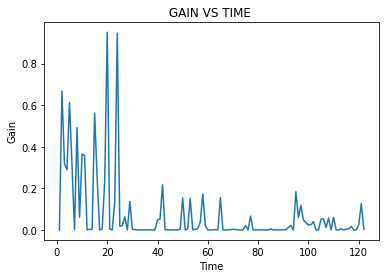

In [65]:
plt.xlabel("Time")
plt.ylabel("Gain")
plt.title(" GAIN VS TIME  ")
plt.plot(time,list3)

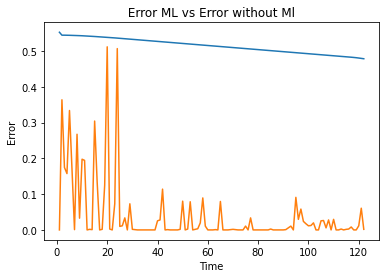

In [66]:
plt.xlabel("Time")
plt.ylabel("Error")
plt.title(" Error ML vs Error without Ml ")
plt.plot(time,list1)
plt.plot(time,list2)